In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [3]:
wiki_nobel_laureates = requests.get("https://en.wikipedia.org/wiki/List_of_Nobel_laureates")

In [4]:
LaureatesDataFrame = pd.read_html(wiki_nobel_laureates.text)[0][:-1]
LaureatesDataFrame.head()

C:\Users\Adeloye Victor\AppData\Local\Temp\ipykernel_15660\3792718324.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  LaureatesDataFrame = pd.read_html(wiki_nobel_laureates.text)[0][:-1]


,Year,Physics,Chemistry,Physiology or Medicine,Literature,Peace,Economics (The Sveriges Riksbank Prize)[13][a]
0,1901,Wilhelm Röntgen,Jacobus Henricus van 't Hoff,Emil von Behring,Sully Prudhomme,Henry Dunant; Frédéric Passy,—
1,1902,Hendrik Lorentz; Pieter Zeeman,Emil Fischer,Ronald Ross,Theodor Mommsen,Élie Ducommun; Charles Albert Gobat,—
2,1903,Henri Becquerel; Pierre Curie; Marie Curie,Svante Arrhenius,Niels Ryberg Finsen,Bjørnstjerne Bjørnson,Randal Cremer,—
3,1904,Lord Rayleigh,William Ramsay,Ivan Pavlov,Frédéric Mistral; José Echegaray,Institut de Droit International,—
4,1905,Philipp Lenard,Adolf von Baeyer,Robert Koch,Henryk Sienkiewicz,Bertha von Suttner,—


In [5]:
LaureatesDataFrame.columns = LaureatesDataFrame.columns.str.strip().str.lower().str.replace(" ", "_")

In [6]:
PhysiologyLaureates = LaureatesDataFrame.physiology_or_medicine.str.split(";", expand=True)

In [7]:
PhysiologyLaureates["year"] = LaureatesDataFrame.year

In [8]:
PhysiologyLaureates = PhysiologyLaureates.set_index("year").stack().reset_index().drop("level_1", axis="columns").rename({0: "name"}, axis="columns")

In [9]:
PhysiologyLaureates

,year,name
0,1901,Emil von Behring
1,1902,Ronald Ross
2,1903,Niels Ryberg Finsen
3,1904,Ivan Pavlov
4,1905,Robert Koch
...,...,...
225,2021,David Julius
226,2021,Ardem Patapoutian
227,2022,Svante Pääbo
228,2023,Katalin Karikó


In [10]:
wiki_laureates_by_country = requests.get("https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_country")

In [11]:
laureates_soup = BeautifulSoup(wiki_laureates_by_country.text)

In [12]:
CountryList = [x.text for x in laureates_soup.find_all(class_="mw-headline") if x.parent.name == "h3"]

In [13]:
LaureateCountryList = [x.text for x in laureates_soup.find_all("ol", class_=False)]

In [14]:
list(zip(CountryList, LaureateCountryList))

[('Argentina',
  'César Milstein*, Physiology or Medicine, 1984\nAdolfo Pérez Esquivel, Peace, 1980\nLuis Federico Leloir, born in France, Chemistry, 1970\nBernardo Houssay, Physiology or Medicine, 1947\nCarlos Saavedra Lamas, Peace, 1936'),
 ('Armenia',
  'Ardem Patapoutian, born in Lebanon, Physiology or Medicine, 2021'),
 ('Australia',
  'Brian Schmidt, born in the United States, Physics, 2011\nElizabeth Blackburn*, Physiology or Medicine, 2009\nBarry Marshall, Physiology or Medicine, 2005\nJ. Robin Warren, Physiology or Medicine, 2005\nPeter C. Doherty, Physiology or Medicine, 1996\nRolf Zinkernagel, Physiology or Medicine, 1996\nJohn Cornforth*, Chemistry, 1975\nPatrick White, born in the United Kingdom, Literature, 1973\nAleksandr M. Prokhorov, Physics, 1964\nJohn Carew Eccles, Physiology or Medicine, 1963\nSir Frank Macfarlane Burnet, Physiology or Medicine, 1960\nHoward Florey, Physiology or Medicine, 1945\nWilliam Lawrence Bragg, Physics, 1915\nWilliam Henry Bragg, Physics, 19

In [15]:
LaureateCountryDF = pd.DataFrame([{"Country": x[0], "Data": x[1]} for x in zip(CountryList, LaureateCountryList)])

In [16]:
LaureateCountryDF.head()

,Country,Data
0,Argentina,"César Milstein*, Physiology or Medicine, 1984\..."
1,Armenia,"Ardem Patapoutian, born in Lebanon, Physiology..."
2,Australia,"Brian Schmidt, born in the United States, Phys..."
3,Austria,"Anton Zeilinger, Physics, 2022\nPeter Handke, ..."
4,Bangladesh,"Muhammad Yunus, Peace, 2006"


In [17]:
TempDf = LaureateCountryDF.Data.str.split("\n", expand=True)

In [18]:
TempDf["Country"] = LaureateCountryDF.Country

In [19]:
TempDf = TempDf.set_index("Country").stack().reset_index().drop(columns=["level_1"]).rename({0: "Laureate"}, axis="columns")

In [20]:
Country_Of_Birth = ~TempDf.Laureate.str.contains("born")

In [21]:
Country = TempDf.Country

In [22]:
TempDf = TempDf.Laureate.str.extract(r"(?P<Name>[^,\n]+)(?:.+){0,4}, (?P<Field>Physiology or Medicine|Peace|Chemistry|Physics|Economics|Literature), (?P<Year>\d{4})")

In [23]:
TempDf["Country"] = Country

In [24]:
TempDf.Name = TempDf.Name.str.replace("*", "")

In [25]:
TempDf["Country_Of_Birth"] = Country_Of_Birth

In [26]:
LaureateCountryDF = TempDf.copy()

In [27]:
LaureateCountryDF.head()

,Name,Field,Year,Country,Country_Of_Birth
0,César Milstein,Physiology or Medicine,1984,Argentina,True
1,Adolfo Pérez Esquivel,Peace,1980,Argentina,True
2,Luis Federico Leloir,Chemistry,1970,Argentina,False
3,Bernardo Houssay,Physiology or Medicine,1947,Argentina,True
4,Carlos Saavedra Lamas,Peace,1936,Argentina,True


In [29]:
PhysiologyLaureates = LaureateCountryDF[LaureateCountryDF.Field == "Physiology or Medicine"]

In [33]:
PhysiologyLaureatesMigrated = PhysiologyLaureates[PhysiologyLaureates.Country_Of_Birth == False]

In [95]:
LaureateCounts = PhysiologyLaureatesMigrated.Country.value_counts()[:5]

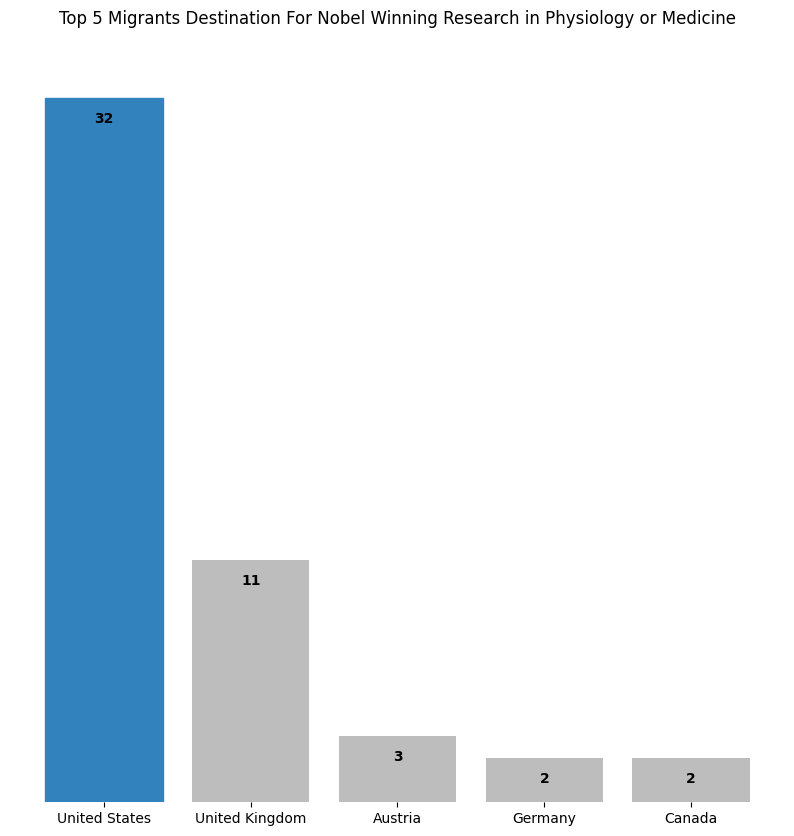

In [145]:
plt.figure(figsize=(10, 10))
bars = plt.bar(LaureateCounts.index, LaureateCounts.values, color="#bdbdbd")
bars[0].set_color("#3182bd")
plt.gca().bar_label(bars, LaureateCounts.values, label_type="edge", padding=-20, fontweight="bold", color="black")
plt.box(False)
plt.title("Top 5 Migrants Destination For Nobel Winning Research in Physiology or Medicine")
plt.yticks([])
plt.ylim((0,35))
plt.show()

In [102]:
ChemistryLaureate = LaureateCountryDF[(LaureateCountryDF.Field == "Chemistry") & (Country_Of_Birth == False)]

In [105]:
ChemistryLaureateMigrated = ChemistryLaureate.Country.value_counts()[:5]

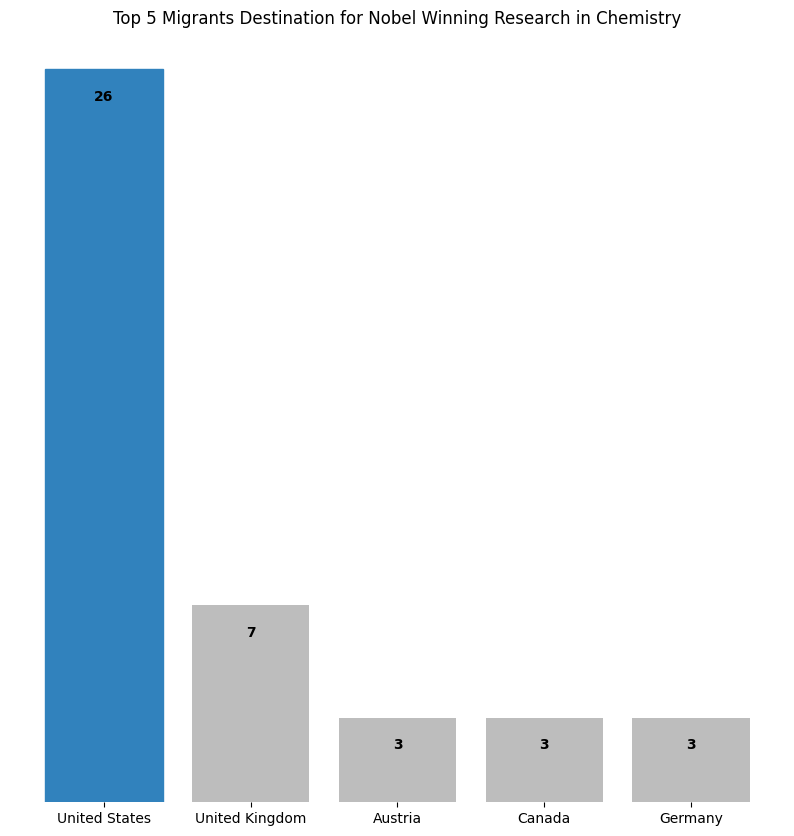

In [144]:
plt.figure(figsize=(10,10))
rects = plt.bar(ChemistryLaureateMigrated.index, ChemistryLaureateMigrated.values, color="#bdbdbd")
rects[0].set_color("#3182bd")
plt.box(False)
plt.yticks([])
plt.bar_label(rects, ChemistryLaureateMigrated.values, padding=-25, color="black", fontweight="bold")
plt.title("Top 5 Migrants Destination for Nobel Winning Research in Chemistry")
plt.show()

In [121]:
PhysicsLaureates = LaureateCountryDF[(LaureateCountryDF.Field == "Physics") & (LaureateCountryDF.Country_Of_Birth == False)]

In [133]:
PhysicsLaureatesMigrated = PhysicsLaureates.Country.value_counts()[0:5]

In [134]:
PhysicsLaureatesMigrated.rename({"Russia and Soviet Union": "Russia"}, inplace=True)

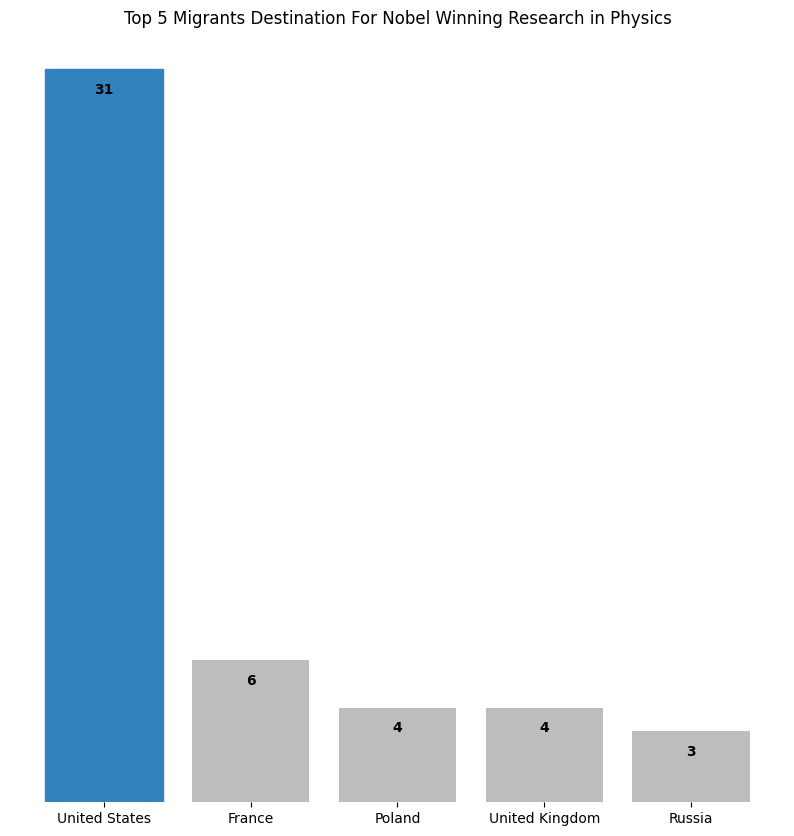

In [143]:
plt.figure(figsize=(10,10))
rects = plt.bar(PhysicsLaureatesMigrated.index, PhysicsLaureatesMigrated.values, color="#bdbdbd")
rects[0].set_color("#3182bd")
plt.box(False)
plt.yticks([])
plt.bar_label(rects, PhysicsLaureatesMigrated.values, padding=-20, fontweight="bold", color="black")
plt.title("Top 5 Migrants Destination For Nobel Winning Research in Physics")
plt.show()